# Travel Destination Recommendation System Notebook


## Problem Statement

The goal is to build a machine learning model that can predict hotel ratings based on customer reviews, budget, specific locations, and the type of residence. The dataset is scraped from TripAdvisor and it contains information about various hotels, including their ratings, reviews, amenities, pricing, geographical coordinates, and residence types (e.g., hotel, bed and breakfast, specialty lodging). By analyzing the text reviews along with these additional factors, the objective is to develop a model that can accurately predict the ratings of new, unseen hotels based on customer reviews, budget constraints, location preferences, and residence type.

Approach:

Data Preprocessing: Clean and preprocess the text reviews by removing stopwords, punctuation, and performing tokenization. Convert the text data into a numerical representation suitable for modeling. Handle missing values, if any, in the budget, location, and residence type columns.

Feature Engineering: Extract additional features from the dataset, such as review sentiment scores, review length, and any other relevant information. Engineer new features related to budget, location, and residence type, such as price range categories, geographical distance from landmarks, and one-hot encoding of residence types.

Model Selection: Experiment with different supervised learning models, such as linear regression, decision trees, random forests, or neural networks, to find the best model for predicting hotel ratings considering customer reviews, budget, location, and residence type. Evaluate the models using appropriate evaluation metrics like mean squared error (MSE) or mean absolute error (MAE).

Model Training and Evaluation: Split the dataset into training and testing sets. Train the selected model on the training set and evaluate its performance on the testing set. Fine-tune the model parameters to improve its accuracy. Perform cross-validation to assess the model's generalization capabilities.

## Data Understanding

In [42]:
# Importing necessary libraries
import pandas as pd
import json
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plotly
import plotly.express as px
import plotly.graph_objects as go

In [2]:
#func to read json files
def read_json_files(json_files):
    dfs = []
    for file in json_files:
        with open(file) as f:
            json_data = json.load(f)
            df = pd.DataFrame(json_data)
            dfs.append(df)

    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df


In [3]:
json_files = json_files = ['../Data/botswana.json', '../Data/capeverde.json', '../Data/drc.json', '../Data/egypt.json', '../Data/ethiopia.json', '../Data/ghana.json', '../Data/kenya.json',
              '../Data/madagascar.json', '../Data/malawi.json', '../Data/morocco.json', '../Data/namibia.json', '../Data/nigeria.json', '../Data/rwanda.json',
              '../Data/senegal.json', '../Data/seychelles.json', '../Data/south_africa.json', '../Data/tanzania.json', '../Data/uganda.json', '../Data/zambia.json']
df = read_json_files(json_files)
df.head()

,id,type,category,subcategories,name,locationString,description,image,photoCount,awards,...,menuWebUrl,establishmentTypes,ownersTopReasons,guideFeaturedInCopy,rentalDescriptions,photos,bedroomInfo,bathroomInfo,bathCount,baseDailyRate
0,1171922,ATTRACTION,attraction,[Sights & Landmarks],Khwai River Bridge,"Okavango Delta, North-West District",None,https://media-cdn.tripadvisor.com/media/photo-...,24,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2513264,ATTRACTION,attraction,[Nature & Parks],Gaborone Game Reserve,"Gaborone, South-East District",None,https://media-cdn.tripadvisor.com/media/photo-...,84,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3247057,ATTRACTION,attraction,[Sights & Landmarks],ISKCON Gaborone,"Gaborone, South-East District",None,https://media-cdn.tripadvisor.com/media/photo-...,21,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,478934,ATTRACTION,attraction,[Nature & Parks],Serondela Reserve,"Chobe National Park, North-West District",This region of Chobe National Park is known as...,https://media-cdn.tripadvisor.com/media/photo-...,65,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7931216,ATTRACTION,attraction,[Nature & Parks],Khutse Game Reserve,"Gaborone, South-East District",None,https://media-cdn.tripadvisor.com/media/photo-...,26,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35836 entries, 0 to 35835
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     35836 non-null  object 
 1   type                   35836 non-null  object 
 2   category               35836 non-null  object 
 3   subcategories          34497 non-null  object 
 4   name                   35836 non-null  object 
 5   locationString         34497 non-null  object 
 6   description            20129 non-null  object 
 7   image                  28495 non-null  object 
 8   photoCount             35836 non-null  int64  
 9   awards                 34497 non-null  object 
 10  rankingPosition        26570 non-null  float64
 11  rating                 26706 non-null  float64
 12  rawRanking             26570 non-null  float64
 13  phone                  24666 non-null  object 
 14  address                34494 non-null  object 
 15  ad

In [5]:
# converting to csv
# df.to_csv('compiled_data.csv', index=False)

In [6]:
df.columns

Index(['id', 'type', 'category', 'subcategories', 'name', 'locationString',
       'description', 'image', 'photoCount', 'awards', 'rankingPosition',
       'rating', 'rawRanking', 'phone', 'address', 'addressObj', 'localName',
       'localAddress', 'email', 'latitude', 'longitude', 'webUrl', 'website',
       'rankingString', 'rankingDenominator', 'neighborhoodLocations',
       'nearestMetroStations', 'ancestorLocations', 'ratingHistogram',
       'numberOfReviews', 'reviewTags', 'reviews', 'booking', 'offerGroup',
       'subtype', 'hotelClass', 'amenities', 'numberOfRooms', 'priceLevel',
       'priceRange', 'roomTips', 'checkInDate', 'checkOutDate', 'offers',
       'hotelClassAttribution', 'localLangCode', 'isClosed', 'isLongClosed',
       'openNowText', 'cuisines', 'mealTypes', 'dishes', 'features',
       'dietaryRestrictions', 'hours', 'menuWebUrl', 'establishmentTypes',
       'ownersTopReasons', 'guideFeaturedInCopy', 'rentalDescriptions',
       'photos', 'bedroomInfo', '

# Data Cleaning

#### Removing Irrelevant columns

There are several columns and attributes that are not useful for our analysis. These include **'image'**, **'photoCount'**, **'awards'**, **'phone'**, **'address'** , **'email'** **'webUrl'**, **'website'** **'neighborhoodLocations'**, **'nearestMetroStations'**, **'booking'**, **'offerGroup'**, **'subtype'**, **'hotelClass'**, **'roomTips'**, **'checkInDate'**, **'checkOutDate'**, **'offers'**, **'hotelClassAttribution'**, **'localLangCode'**, **'isClosed'**, **'isLongClosed'**, **'openNowText'**, **'dietaryRestrictions'**, **'hours'**, **'menuWebUrl'**, **'establishmentTypes'**, **'ownersTopReasons'**, **'guideFeaturedInCopy'**, **'rentalDescriptions'** and **'photos'**. 
Some columns have the similar attributes and therefore we drop them to be be left with one. This include **type** and **category**, **ancestorLocations**, **localAddress** and **locationString** and **'name'** and **localName**.

In [7]:
columns_to_drop = ['image', 'photoCount', 'awards', 'phone', 'address', 'email', 'localAddress', 'locationString',
                   'webUrl', 'website', 'neighborhoodLocations', 'nearestMetroStations', 'ancestorLocations',
                   'booking', 'offerGroup', 'subtype', 'hotelClass', 'roomTips', 'checkInDate', 'category',
                   'checkOutDate', 'offers', 'hotelClassAttribution', 'localLangCode', 'isClosed', 'ratingHistogram',
                   'isLongClosed', 'openNowText', 'dietaryRestrictions', 'hours', 'menuWebUrl', 'localName', 
                   'establishmentTypes', 'ownersTopReasons', 'guideFeaturedInCopy', 'rentalDescriptions','photos']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,...,priceLevel,priceRange,cuisines,mealTypes,dishes,features,bedroomInfo,bathroomInfo,bathCount,baseDailyRate
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.65297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['id', 'type', 'subcategories', 'name', 'description', 'rankingPosition',
       'rating', 'rawRanking', 'addressObj', 'latitude', 'longitude',
       'rankingString', 'rankingDenominator', 'numberOfReviews', 'reviewTags',
       'reviews', 'amenities', 'numberOfRooms', 'priceLevel', 'priceRange',
       'cuisines', 'mealTypes', 'dishes', 'features', 'bedroomInfo',
       'bathroomInfo', 'bathCount', 'baseDailyRate'],
      dtype='object')

### Handling Missing values

In [9]:
# define a function that finds the percentage of missing values of columns with missing values

def missing_values_percentage(df):
    return df.isnull().sum() / len(df) * 100

column_percentages = missing_values_percentage(df)
columns_with_missing_values = column_percentages[column_percentages > 0]
columns_with_missing_values.sort_values(ascending=False)


features              98.839156
dishes                98.839156
mealTypes             98.839156
cuisines              98.839156
baseDailyRate         96.461659
bathCount             96.263534
bathroomInfo          96.263534
bedroomInfo           96.263534
priceRange            60.545262
priceLevel            60.288537
numberOfRooms         52.349593
description           43.830227
amenities             27.011943
rankingDenominator    25.856680
rankingString         25.856680
rawRanking            25.856680
rankingPosition       25.856680
rating                25.477174
longitude             16.000670
latitude              16.000670
reviewTags             3.736466
addressObj             3.736466
subcategories          3.736466
dtype: float64

Some columns such as features, dishes, mealTypes, cuisines, baseDailyRate, bathCount, bathroomInfo, bedroomInfo have missing values above 90 percent. We opt to drop them.

In [10]:
above_90_missing_col = ['features', 'dishes', 'mealTypes', 'cuisines', 'baseDailyRate', 'bathCount', 'bathroomInfo', 'bedroomInfo']
df.drop(columns=above_90_missing_col, inplace=True)
df.head()

,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,longitude,rankingString,rankingDenominator,numberOfReviews,reviewTags,reviews,amenities,numberOfRooms,priceLevel,priceRange
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",NaN,NaN,#3 of 5 things to do in Okavango Delta,5,45,[],[],NaN,NaN,NaN,NaN
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",NaN,NaN,#7 of 25 things to do in Gaborone,25,115,"[{'text': 'eland', 'reviews': 7}, {'text': 'an...",[],NaN,NaN,NaN,NaN
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.65297,25.89846,#5 of 25 things to do in Gaborone,25,23,[],[],NaN,NaN,NaN,NaN
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",NaN,NaN,#3 of 8 things to do in Chobe National Park,8,34,"[{'text': 'the river', 'reviews': 6}, {'text':...",[],NaN,NaN,NaN,NaN
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",NaN,NaN,#8 of 25 things to do in Gaborone,25,29,"[{'text': 'bucket shower', 'reviews': 5}, {'te...",[],NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35836 entries, 0 to 35835
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  35836 non-null  object 
 1   type                35836 non-null  object 
 2   subcategories       34497 non-null  object 
 3   name                35836 non-null  object 
 4   description         20129 non-null  object 
 5   rankingPosition     26570 non-null  float64
 6   rating              26706 non-null  float64
 7   rawRanking          26570 non-null  float64
 8   addressObj          34497 non-null  object 
 9   latitude            30102 non-null  float64
 10  longitude           30102 non-null  float64
 11  rankingString       26570 non-null  object 
 12  rankingDenominator  26570 non-null  object 
 13  numberOfReviews     35836 non-null  int64  
 14  reviewTags          34497 non-null  object 
 15  reviews             35836 non-null  object 
 16  amen

In [12]:
columns_with_missing_values.sort_values(ascending=False)

features              98.839156
dishes                98.839156
mealTypes             98.839156
cuisines              98.839156
baseDailyRate         96.461659
bathCount             96.263534
bathroomInfo          96.263534
bedroomInfo           96.263534
priceRange            60.545262
priceLevel            60.288537
numberOfRooms         52.349593
description           43.830227
amenities             27.011943
rankingDenominator    25.856680
rankingString         25.856680
rawRanking            25.856680
rankingPosition       25.856680
rating                25.477174
longitude             16.000670
latitude              16.000670
reviewTags             3.736466
addressObj             3.736466
subcategories          3.736466
dtype: float64

##### **price range** and **price level**

In [13]:
#previewing price level and price range
df.head()[['priceLevel', 'priceRange', 'type']]


,priceLevel,priceRange,type
0,NaN,NaN,ATTRACTION
1,NaN,NaN,ATTRACTION
2,NaN,NaN,ATTRACTION
3,NaN,NaN,ATTRACTION
4,NaN,NaN,ATTRACTION


The price level column has only dollar signs and null values, therefore we will drop it. The price range column has a range in Kenya Shillings of the amount tourists can spend in the travel destination. We create two new columns with an upper and lower limit and then fill the missing valuea with the minimum amount if the type is attraction and the mean value if the type is hotel.

In [14]:
# Split the PriceRange column into UpperLimit and LowerLimit columns
df[['LowerPrice', 'UpperPrice']] = df['priceRange'].str.replace('KES', '').str.split(' - ', expand=True)
# Convert UpperLimit and LowerLimit columns to numeric  
df['LowerPrice'] = df['LowerPrice'].str.replace(',', '').astype(float)
df['UpperPrice'] = df['UpperPrice'].str.replace(',', '').astype(float)
# Fill missing values with minimum in 'LowerLimit' and 'UpperLimit' columns for type 'ATTRACTION'
df.loc[df['type'] == 'ATTRACTION', 'LowerPrice'] = df.loc[df['type'] == 'ATTRACTION', 'LowerPrice'].fillna(df['LowerPrice'].min())
df.loc[df['type'] == 'ATTRACTION', 'UpperPrice'] = df.loc[df['type'] == 'ATTRACTION', 'UpperPrice'].fillna(df['UpperPrice'].min())

# Fill missing values with mean in 'LowerLimit' and 'UpperLimit' columns for type 'HOTEL'
df.loc[df['type'] == 'HOTEL', 'LowerPrice'] = df.loc[df['type'] == 'HOTEL', 'LowerPrice'].fillna(df['LowerPrice'].mean())
df.loc[df['type'] == 'HOTEL', 'UpperPrice'] = df.loc[df['type'] == 'HOTEL', 'UpperPrice'].fillna(df['UpperPrice'].mean())
df.head()

,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,...,rankingDenominator,numberOfReviews,reviewTags,reviews,amenities,numberOfRooms,priceLevel,priceRange,LowerPrice,UpperPrice
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,5,45,[],[],NaN,NaN,NaN,NaN,141.0,281.0
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",NaN,...,25,115,"[{'text': 'eland', 'reviews': 7}, {'text': 'an...",[],NaN,NaN,NaN,NaN,141.0,281.0
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.65297,...,25,23,[],[],NaN,NaN,NaN,NaN,141.0,281.0
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,8,34,"[{'text': 'the river', 'reviews': 6}, {'text':...",[],NaN,NaN,NaN,NaN,141.0,281.0
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",NaN,...,25,29,"[{'text': 'bucket shower', 'reviews': 5}, {'te...",[],NaN,NaN,NaN,NaN,141.0,281.0


#### **amenities**

In [15]:
df.tail(10)[['amenities', 'type' ]]

,amenities,type
35826,[],HOTEL
35827,"[Room service, Free parking, Airport transport...",HOTEL
35828,[],HOTEL
35829,[],HOTEL
35830,"[Free parking, Restaurant, Bar/Lounge, Airport...",HOTEL
35831,[],HOTEL
35832,[],HOTEL
35833,"[Kids Activities, Restaurant, Bar/Lounge, Hot ...",HOTEL
35834,[],HOTEL
35835,[],HOTEL


In [16]:
df['type'].value_counts()

type
HOTEL              24817
ATTRACTION          9264
VACATION_RENTAL     1339
RESTAURANT           416
Name: count, dtype: int64

In [17]:
# Replace NaN values with "bathroom only" where type is "attraction"
df.loc[(df['type'] == 'RESTAURANT') & (df['amenities'].isna()), 'amenities'] = 'restaurant'
df.loc[(df['type'] == 'ATTRACTION') & (df['amenities'].isna()), 'amenities'] = 'bathroom only'
# Define the value to populate empty lists
new_data = ['restaurant', 'bathroom', 'room']  # Replace with your desired data

# Populate empty lists using list comprehension
df['amenities'] = [new_data if isinstance(value, list) and not value else value for value in df['amenities']]
df.head()

,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,...,rankingDenominator,numberOfReviews,reviewTags,reviews,amenities,numberOfRooms,priceLevel,priceRange,LowerPrice,UpperPrice
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,5,45,[],[],bathroom only,NaN,NaN,NaN,141.0,281.0
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",NaN,...,25,115,"[{'text': 'eland', 'reviews': 7}, {'text': 'an...",[],bathroom only,NaN,NaN,NaN,141.0,281.0
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.65297,...,25,23,[],[],bathroom only,NaN,NaN,NaN,141.0,281.0
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,8,34,"[{'text': 'the river', 'reviews': 6}, {'text':...",[],bathroom only,NaN,NaN,NaN,141.0,281.0
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",NaN,...,25,29,"[{'text': 'bucket shower', 'reviews': 5}, {'te...",[],bathroom only,NaN,NaN,NaN,141.0,281.0


In [18]:
df['amenities'].isna().sum()

0

#### **rankingDenominator**, **rankingString**, **rawRanking**, **rankingPosition** and **rating**

In [19]:
df.head()[['rankingDenominator', 'rankingString', 'rawRanking', 'rankingPosition', 'rating', 'type']]

,rankingDenominator,rankingString,rawRanking,rankingPosition,rating,type
0,5,#3 of 5 things to do in Okavango Delta,3.155229,3.0,4.5,ATTRACTION
1,25,#7 of 25 things to do in Gaborone,2.956184,7.0,3.5,ATTRACTION
2,25,#5 of 25 things to do in Gaborone,2.974105,5.0,4.5,ATTRACTION
3,8,#3 of 8 things to do in Chobe National Park,3.029962,3.0,4.5,ATTRACTION
4,25,#8 of 25 things to do in Gaborone,2.944026,8.0,4.0,ATTRACTION


The ranking string column contains ranking information in string format. To parse it, we need to create new columns from it by extracting the ranking type, location, numerator and denominator. We will then drop **'rankingDenominator'**, **'rankingString'**, **'rawRanking'** and **'rankingPosition'**

In [20]:
# Create new columns
df['RankingType'] = ""
df['Location'] = ""
df['Numerator'] = ""
df['Denominator'] = ""

# Iterate through the rows and extract the information
for index, row in df.iterrows():
    # Check if the value is NaN
    if pd.isnull(row['rankingString']):
        continue

    if match := re.match(
        r'#(\d+)\s+of\s+(\d+)\s+(.*?)\s+in\s+(.*?)$', row['rankingString']
    ):
        numerator = match.group(1)
        denominator = match.group(2)
        ranking_type = match.group(3)
        location = match.group(4)

        # Update the new columns
        df.at[index, 'RankingType'] = ranking_type
        df.at[index, 'Location'] = location
        df.at[index, 'Numerator'] = numerator
        df.at[index, 'Denominator'] = denominator

We define a dictionary called 'mappings' that maps specific values in the 'RankingType' column to their corresponding updated values. Then, it replaces the values in the 'RankingType' column of the DataFrame 'df' using the defined mappings.

In [21]:
# Define the mappings to combine similar values
mappings = {
    'hotel': 'hotels',
    'B&B / Inn' : 'B&Bs / Inns',
    'Sights & Landmarks': 'Nature & Parks',
    'Fun & Games': 'Outdoor Activities',
    'Boat Tours & Water Sports': 'Water & Amusement Parks',
    'Traveler Resources': 'Shopping',
    'Concerts & Shows': 'Nightlife',
    'Food & Drink': 'places to eat',
    'Nature & Parks': 'things to do',
    'Museums': 'things to do',
    'Tours' : 'things to do',
    'Outdoor Activities': 'things to do',
    'B&Bs / Inns': 'Specialty lodging',
    
}

# Replace the values in the 'Ranking Type' column
df['RankingType'] = df['RankingType'].replace(mappings)

In [22]:
# Define the mapping of types to ranking types
type_mapping = {
    'ATTRACTION': 'things to do',
    'HOTEL': np.random.choice(['hotel', 'Specialty lodging'], size=1)[0],
    # Add more types and their corresponding ranking types as needed
}

# Fill empty rows in RankingType based on type
df['RankingType'] = np.where((df['RankingType'] == '') & (df['type'].map(type_mapping) != ''), df['type'].map(type_mapping), df['RankingType'])

df['RankingType'] = df['RankingType'].fillna('VACATION_RENTAL').replace('VACATION_RENTAL', 'Specialty lodging')
df['RankingType'] = df['RankingType'].fillna('RESTAURANT').replace('RESTAURANT', 'places to eat')

Since 'rankingDenominator', 'rankingString', 'rawRanking', 'rankingPosition'  have a substantial ammount of missing values we will drop these columns.

We fill the missing values in the ratings column with 0

In [24]:
# replacing ratings column missing values with 0 
df['rating'].fillna(0, inplace=True)

**'numberOfReviews','reviewTags' and 'reviews' columns**

In [25]:
df[['numberOfReviews','reviewTags', 'reviews']]

,numberOfReviews,reviewTags,reviews
0,45,[],[]
1,115,"[{'text': 'eland', 'reviews': 7}, {'text': 'an...",[]
2,23,[],[]
3,34,"[{'text': 'the river', 'reviews': 6}, {'text':...",[]
4,29,"[{'text': 'bucket shower', 'reviews': 5}, {'te...",[]
...,...,...,...
35831,0,[],[]
35832,0,[],[]
35833,0,[],[]
35834,0,[],[]


- The *'numberOfReviews'* column represent the number of reviews for each tourist destination.

- The *'reviews column'* has rows that have the same empty list '[ ]' value, the column does not provide any useful information or insights about the data. It does not contribute to the analysis or modeling process.

- The *'reviewTags'* column are tags associated with the reviews. It appears to contain a list of dictionaries, where each dictionary represents a review. Each dictionary has two keys: 'text' and 'reviews'. The 'text' key holds the review text, and the 'reviews' key holds the corresponding number of reviews.

- We can infer that it contains reviews or feedback related to a specific subject. Each review is represented by a dictionary with the review text and the number of reviews associated with it.

-  We convert the 'reviewTags' column values from lists of dictionaries to a column with a list of strings by extracting  the 'text' values from the dictionaries.



In [26]:
def clean_review_tags(df):
    """function to clean review tags"""
    df.loc[:, 'reviewTags'] = df['reviewTags'].apply(lambda entries: [{'text': entry['text']} for entry in entries] if isinstance(entries, list) else [])
    df.loc[:, 'reviewTags'] = df['reviewTags'].apply(lambda tags: [tag['text'] for tag in tags])
    return df

df_filtered = clean_review_tags(df)
df_filtered.head()


,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,...,amenities,numberOfRooms,priceLevel,priceRange,LowerPrice,UpperPrice,RankingType,Location,Numerator,Denominator
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,bathroom only,NaN,NaN,NaN,141.0,281.0,things to do,Okavango Delta,3,5
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",NaN,...,bathroom only,NaN,NaN,NaN,141.0,281.0,things to do,Gaborone,7,25
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.65297,...,bathroom only,NaN,NaN,NaN,141.0,281.0,things to do,Gaborone,5,25
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,bathroom only,NaN,NaN,NaN,141.0,281.0,things to do,Chobe National Park,3,8
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",NaN,...,bathroom only,NaN,NaN,NaN,141.0,281.0,things to do,Gaborone,8,25


Calculating the sum of all rows where the 'reviewTags' column contains empty lists.

In [27]:
total_sum = sum(1 for tags in df['reviewTags'] if tags == [])
total_sum

23063

Since the reviewTags column has many empty lists we will drop the column.

#### **latitude** and **longitude**

In [28]:
df.head()[['longitude','latitude', 'Location']]

,longitude,latitude,Location
0,NaN,NaN,Okavango Delta
1,NaN,NaN,Gaborone
2,25.89846,-24.65297,Gaborone
3,NaN,NaN,Chobe National Park
4,NaN,NaN,Gaborone


We Interpolate longitude and latitude values  because these geographic coordinates often exhibit a continuous pattern or follow a spatial relationship. Interpolation estimates the missing values based on the known data points and can provide a reasonable approximation of the actual values.

Here are a few reasons why we found interpolating longitude and latitude values to be beneficial:

- Spatial Continuity: Longitude and latitude values often have a spatial continuity, meaning that nearby locations tend to have similar values. Interpolation methods take advantage of this spatial relationship to estimate missing values based on neighboring known values.

- Data Preservation: Interpolation methods help preserve the overall pattern of the data by filling in missing values in a manner that aligns with the existing values. This can be useful for maintaining the spatial integrity of a dataset.

- Useful for Visualization and Analysis: Filling missing values using interpolation allows for better visualization and analysis of geographical data. Complete datasets facilitate mapping and spatial analysis.

In [29]:
def fill_missing_coordinates(df):
    df['longitude'] = df['longitude'].interpolate()
    df['latitude'] = df['latitude'].interpolate()
    df['longitude'] = df['longitude'].fillna(method='bfill')
    df['latitude'] = df['latitude'].fillna(method='bfill')
    return df
df = fill_missing_coordinates(df)


#### **subcategories**

In [30]:
df[['subcategories', 'type']]

,subcategories,type
0,[Sights & Landmarks],ATTRACTION
1,[Nature & Parks],ATTRACTION
2,[Sights & Landmarks],ATTRACTION
3,[Nature & Parks],ATTRACTION
4,[Nature & Parks],ATTRACTION
...,...,...
35831,[Bed and Breakfast],HOTEL
35832,[Bed and Breakfast],HOTEL
35833,[Specialty Lodging],HOTEL
35834,[Hotel],HOTEL


Filtering the DataFrame to include only rows where the "type" column is "VACATION_RENTAL and assigning the missing values in the "subcategories" column of those rows with a list containing only the value "Specialty Lodging".

In [31]:
df.loc[df['type'] == 'VACATION_RENTAL', 'subcategories'] = df.loc[df['type'] == 'VACATION_RENTAL', 'subcategories'].fillna('Specialty Lodging')

In [32]:
df['subcategories'].isna().sum()

0

### **addressObj**

In [33]:
df['addressObj'][0]

{'street1': '',
 'street2': '',
 'city': None,
 'state': None,
 'country': 'Botswana',
 'postalcode': ''}

In [34]:
# drop missing values in the addressObj column
df.dropna(subset=['addressObj'], inplace=True)

Extract the country value from the given dictionary in the 'addressObj' column, so that we can access the 'country' key of the dictionary.

In [35]:
df['country'] = df['addressObj'].apply(lambda x: x['country'] if isinstance(x, dict) else None)
df.head()

,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,...,numberOfRooms,priceLevel,priceRange,LowerPrice,UpperPrice,RankingType,Location,Numerator,Denominator,country
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",-24.652970,...,NaN,NaN,NaN,141.0,281.0,things to do,Okavango Delta,3,5,Botswana
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",-24.652970,...,NaN,NaN,NaN,141.0,281.0,things to do,Gaborone,7,25,Botswana
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.652970,...,NaN,NaN,NaN,141.0,281.0,things to do,Gaborone,5,25,Botswana
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",-23.427362,...,NaN,NaN,NaN,141.0,281.0,things to do,Chobe National Park,3,8,Botswana
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",-22.201755,...,NaN,NaN,NaN,141.0,281.0,things to do,Gaborone,8,25,Botswana


In [36]:
df.columns

Index(['id', 'type', 'subcategories', 'name', 'description', 'rankingPosition',
       'rating', 'rawRanking', 'addressObj', 'latitude', 'longitude',
       'rankingString', 'rankingDenominator', 'numberOfReviews', 'reviewTags',
       'reviews', 'amenities', 'numberOfRooms', 'priceLevel', 'priceRange',
       'LowerPrice', 'UpperPrice', 'RankingType', 'Location', 'Numerator',
       'Denominator', 'country'],
      dtype='object')

In [37]:
columns_to_drop = ['rankingPosition', 'addressObj', 'rawRanking', 'reviewTags', 'rankingString', 'rankingDenominator', 'reviews', 'numberOfRooms', 'priceLevel', 'priceRange']
df.drop(columns=columns_to_drop, inplace=True)

In [38]:
# Replace empty strings with NaN
df = df.replace('', np.nan)

# Drop rows with NaN values
df = df.dropna()

In [41]:
df.head()

,id,type,subcategories,name,description,rating,latitude,longitude,numberOfReviews,amenities,LowerPrice,UpperPrice,RankingType,Location,Numerator,Denominator,country
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,4.5,-23.427362,26.350575,34,bathroom only,141.0,281.0,things to do,Chobe National Park,3,8,Botswana
5,7945044,ATTRACTION,[Sights & Landmarks],Kuminda Farm,It's a small farm and we are into Argo tourism...,5.0,-20.976147,27.254805,22,bathroom only,141.0,281.0,things to do,Francistown,1,3,Botswana
8,479134,ATTRACTION,[Nature & Parks],Kubu Island,Kubu Island’s granite rock surface is stained ...,4.5,-20.896166,25.824165,140,bathroom only,141.0,281.0,things to do,Makgadikgadi Pans National Park,2,3,Botswana
12,1743605,ATTRACTION,"[Casinos & Gambling, Fun & Games]",Gaborone Sun,Botswana is where the white-hot Kalahari Deser...,4.0,-24.651150,25.929050,124,bathroom only,141.0,281.0,things to do,Gaborone,4,25,Botswana
13,4162082,HOTEL,[Specialty Lodging],Pelican Lodge & Camping,"The lodge is situated in Nata, Botswana. Clien...",3.0,-20.218332,26.233501,189,"[Pool, Internet, Free Internet, Free parking, ...",11533.0,13361.0,Specialty lodging,Nata,4,9,Botswana


## EDA and Data Munging

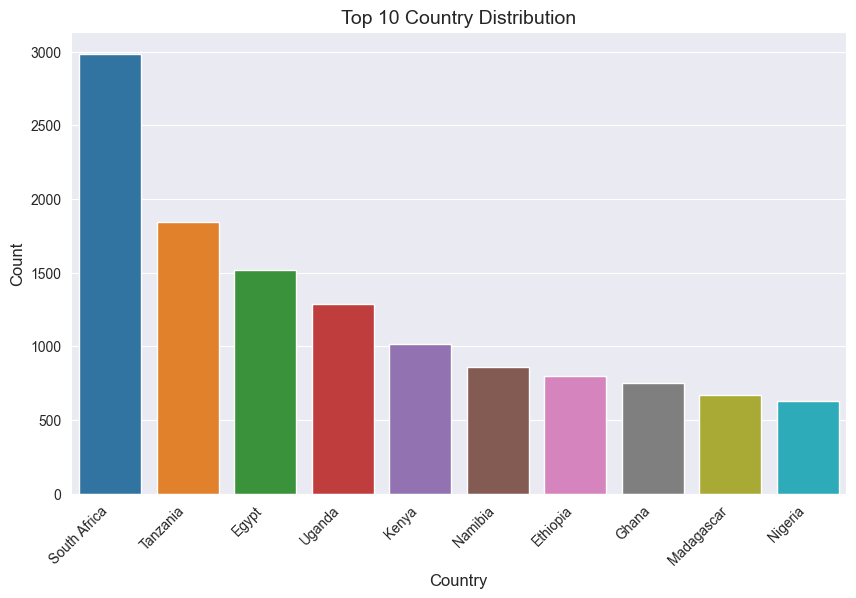

In [46]:
# Countplot of country distribution
country_counts = df['country'].value_counts().sort_values(ascending=False)
top_10_countries = country_counts.head(10)  # Select top 10 countries

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))  # Set the figure size
ax = sns.barplot(x=top_10_countries.index, y=top_10_countries.values)

ax.set_xlabel('Country', fontsize=12)  # Set x-axis label and fontsize
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate tick labels
ax.set_ylabel('Count', fontsize=12)  # Set y-axis label and fontsize
ax.set_title('Top 10 Country Distribution', fontsize=14)  # Set plot title

plt.show() 

## Modelling

## Model Evaluation

## Tuning

## Deployment

## Conclusion and Recommendations